In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = 'data/winequality-white.csv'
df = pd.read_csv(file_path, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# check for nulls ( no nulls), and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df = df[df['total sulfur dioxide'] <= 150]

In [5]:
df['quality_label'] = np.where(df['quality'] >= 7, 'good', 'not good')
df.drop('quality', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3090 entries, 1 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3090 non-null   float64
 1   volatile acidity      3090 non-null   float64
 2   citric acid           3090 non-null   float64
 3   residual sugar        3090 non-null   float64
 4   chlorides             3090 non-null   float64
 5   free sulfur dioxide   3090 non-null   float64
 6   total sulfur dioxide  3090 non-null   float64
 7   density               3090 non-null   float64
 8   pH                    3090 non-null   float64
 9   sulphates             3090 non-null   float64
 10  alcohol               3090 non-null   float64
 11  quality_label         3090 non-null   object 
dtypes: float64(11), object(1)
memory usage: 313.8+ KB


In [7]:
df = pd.get_dummies(df, columns=['quality_label'], drop_first=True)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label_not good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,True
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,True
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,True
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,True


In [9]:
df.shape

(3090, 12)

In [10]:
# separate features from target
y=df['quality_label_not good']
X=df.drop(columns='quality_label_not good')

In [11]:
# clean it up, scale it etc
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


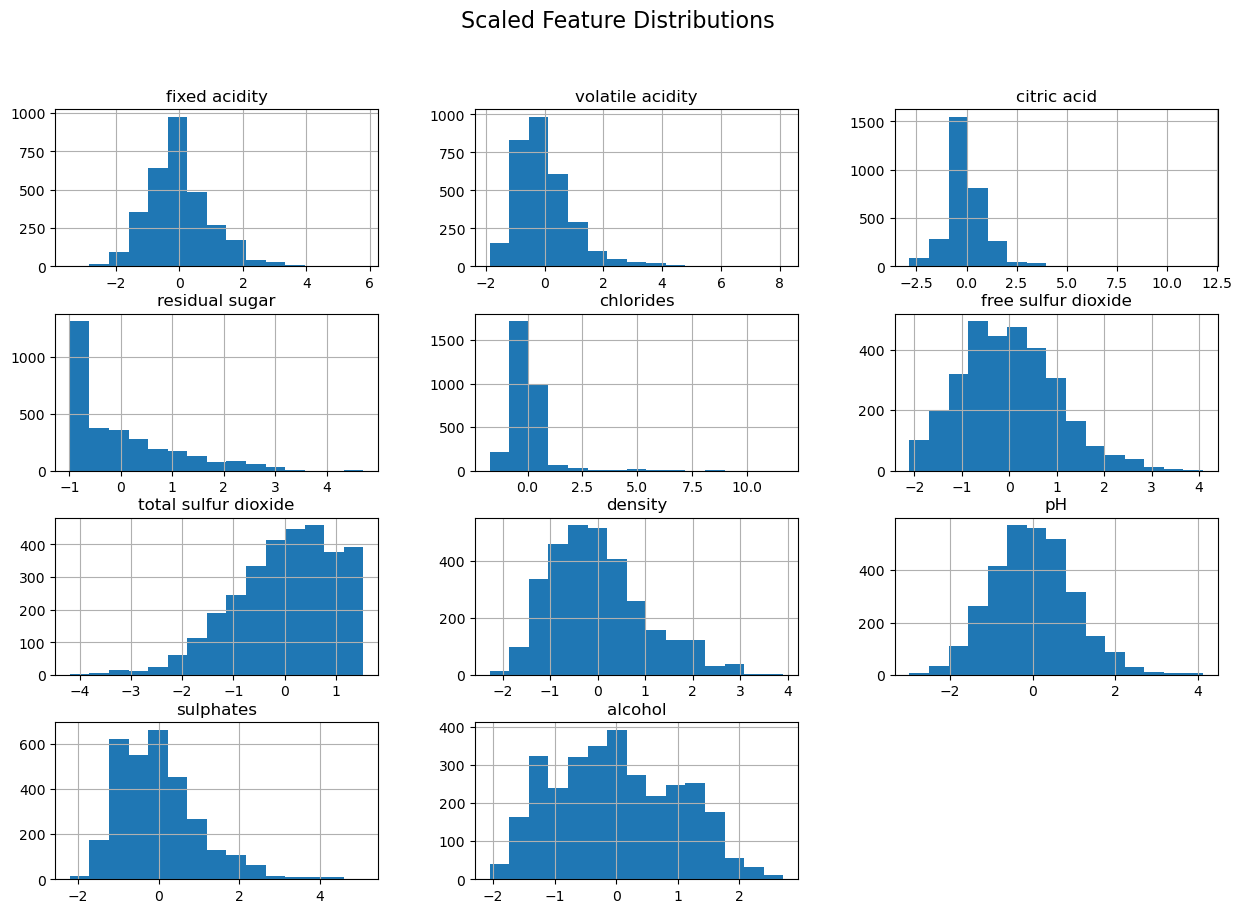

In [12]:
X_scaled_df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Scaled Feature Distributions', fontsize=16)
plt.show()

In [13]:
# train test module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    random_state=1776, 
                                                    stratify=y)
X_train.shape

(2317, 11)

In [14]:
# logistic regress
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=200,
                               random_state=1776)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1776)

In [15]:
# predictions and confusion matrix
testing_predictions = classifier.predict(X_test)
test_matrix = confusion_matrix(y_test, testing_predictions)
print(test_matrix)

[[ 78 133]
 [ 56 506]]


In [16]:
# classification report
test_report = classification_report(y_test, testing_predictions)
print(test_report)

              precision    recall  f1-score   support

       False       0.58      0.37      0.45       211
        True       0.79      0.90      0.84       562

    accuracy                           0.76       773
   macro avg       0.69      0.64      0.65       773
weighted avg       0.73      0.76      0.74       773



In [17]:
# svm
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=1776)
svm_clf.fit(X_train, y_train)
predictions = svm_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.68      0.33      0.44       211
        True       0.79      0.94      0.86       562

    accuracy                           0.77       773
   macro avg       0.74      0.64      0.65       773
weighted avg       0.76      0.77      0.75       773



In [18]:
# pca
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
classifier.fit(X_train_pca, y_train)
predictions = classifier.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.61      0.36      0.45       211
        True       0.79      0.91      0.85       562

    accuracy                           0.76       773
   macro avg       0.70      0.64      0.65       773
weighted avg       0.74      0.76      0.74       773



In [19]:
# random forest
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100, random_state=1776)
rf_clf.fit(X_train, y_train)
predictions = rf_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.79      0.55      0.65       211
        True       0.85      0.94      0.89       562

    accuracy                           0.84       773
   macro avg       0.82      0.75      0.77       773
weighted avg       0.83      0.84      0.83       773



In [20]:
# added balanced class weights with compute_class_weight - calculates weights for each class based on their frequency
# Oversampling: Duplicate data points from the minority class to match the majority class.
# Undersampling: Remove data points from the majority class to match the minority class.

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert the classes to a numpy array
classes = np.array([0, 1])

class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=1776, class_weight=class_weight_dict)
rf_clf.fit(X_train, y_train)

predictions = rf_clf.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

       False       0.80      0.53      0.64       211
        True       0.84      0.95      0.89       562

    accuracy                           0.84       773
   macro avg       0.82      0.74      0.77       773
weighted avg       0.83      0.84      0.82       773



In [21]:
# xgboost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=1776, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_clf.fit(X_train, y_train)
predictions = xgb_clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.71      0.68      0.69       211
        True       0.88      0.90      0.89       562

    accuracy                           0.84       773
   macro avg       0.80      0.79      0.79       773
weighted avg       0.83      0.84      0.84       773



In [22]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the base models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1776, class_weight='balanced')
xgb_clf = XGBClassifier(random_state=1776, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Fit the base models
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

# Create the VotingClassifier with hard voting (majority voting)
ensemble_clf = VotingClassifier(estimators=[
    ('random_forest', rf_clf),
    ('xgboost', xgb_clf)
], voting='hard')

# Fit the ensemble model
ensemble_clf.fit(X_train, y_train)

# Make predictions and evaluate
predictions = ensemble_clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.70      0.70      0.70       211
        True       0.89      0.89      0.89       562

    accuracy                           0.84       773
   macro avg       0.79      0.79      0.79       773
weighted avg       0.84      0.84      0.84       773



In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the base models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1776, class_weight='balanced')
xgb_clf = XGBClassifier(random_state=1776, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Initialize the meta-model (Logistic Regression in this case)
meta_clf = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1776)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('xgboost', xgb_clf)
    ],
    final_estimator=meta_clf,
    passthrough=True  # Pass original features along with predictions to the meta-model
)

# Fit the StackingClassifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate
predictions = stacking_clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.80      0.61      0.69       211
        True       0.86      0.94      0.90       562

    accuracy                           0.85       773
   macro avg       0.83      0.77      0.80       773
weighted avg       0.85      0.85      0.84       773



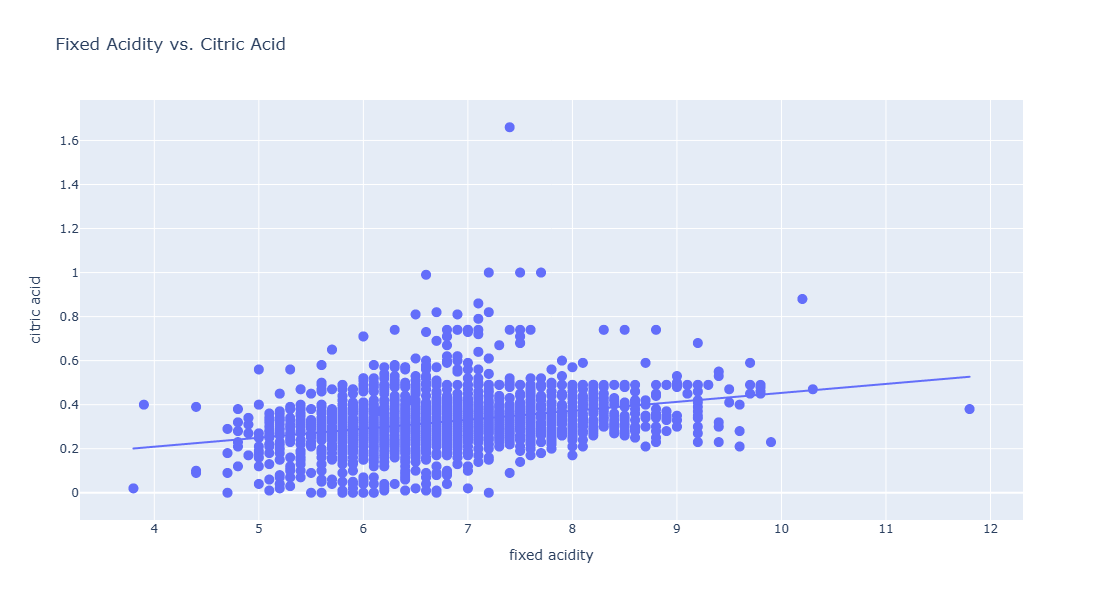

In [32]:
import plotly.express as px

fig = px.scatter(
    df,
    x='fixed acidity',
    y='citric acid',
    trendline='ols',
    title='Fixed Acidity vs. Citric Acid'
)

fig.update_traces(marker=dict(size=10))
fig.update_layout(width=1200, height=600)

fig.show()


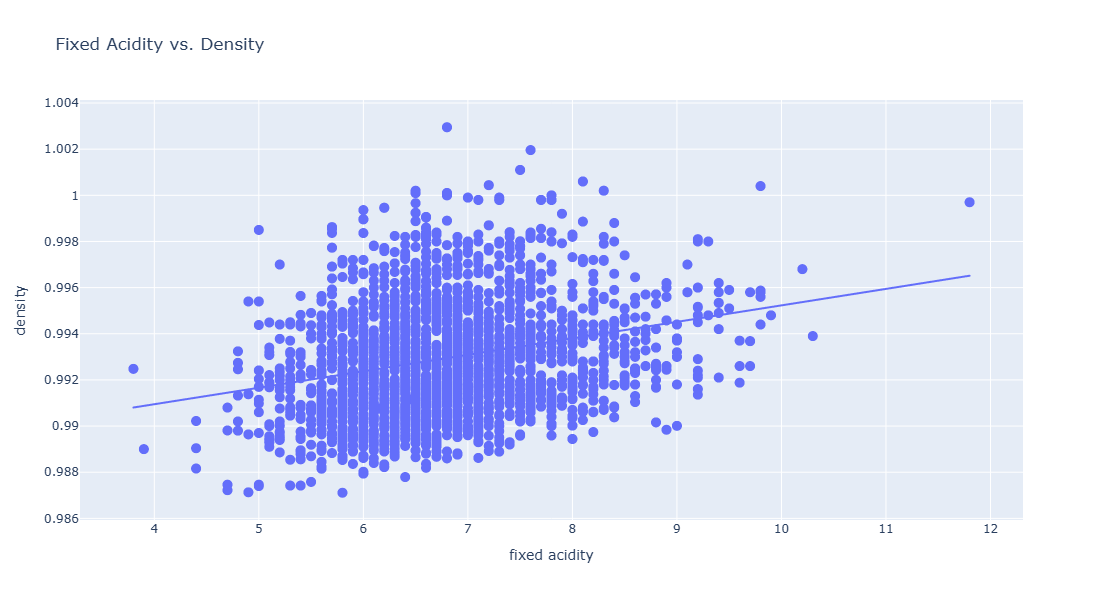

In [25]:
import plotly.express as px

fig = px.scatter(
    df,
    x='fixed acidity',
    y='density',
    trendline='ols',
    title='Fixed Acidity vs. Density'
)

fig.update_traces(marker=dict(size=10))
fig.update_layout(width=1200, height=600)

fig.show()
